['cloudy', 'desert', 'green_area', 'water']


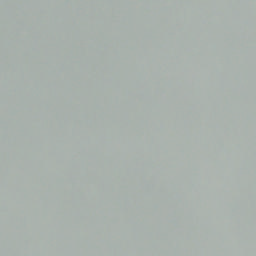

In [5]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img 
print(os.listdir('/kaggle/input/satellite-image-classification/data'))
import cv2
import matplotlib.pyplot as plt
load_img('/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg')

<BarContainer object of 4 artists>

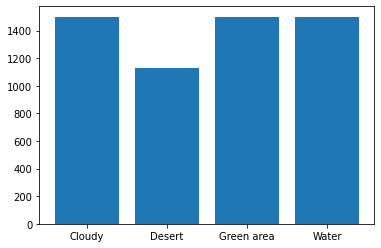

In [7]:
import matplotlib.pyplot as plt
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.bar(x,y)

In [8]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory('/kaggle/input/satellite-image-classification/data',target_size=(64,64)
                                         ,batch_size=32,class_mode='categorical',shuffle=True,subset='training')

Found 4505 images belonging to 4 classes.


In [9]:
test_data=train_gen.flow_from_directory('/kaggle/input/satellite-image-classification/data',target_size=(64,64),
                                   batch_size=1,shuffle=False,subset='validation')

Found 1126 images belonging to 4 classes.


2 Convolutional Layers
1 Batch Normalization Layer
1 Max Pooling Layer
1 Flatten Layer
1 Dropout Layer
3 Dense Layers

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout,AveragePooling2D
model=Sequential()
model.add(Conv2D(33,(3,3),strides = 2,activation = 'relu',padding = 'valid',input_shape=(64,64,3)))  
model.add(Conv2D(45,(3,3),strides = 2,activation = 'relu',padding = 'same'))     
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))
model.add(Flatten())                             
model.add(Dropout(0.1))
model.add(Dense(84,activation = 'sigmoid')) 
model.add(Dense(60,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))  
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 33)        924       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 45)        13410     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 45)        180       
_________________________________________________________________
average_pooling2d (AveragePo (None, 8, 8, 45)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2880)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [26]:
model.fit(train_data,validation_data=test_data,epochs=5)


Epoch 1/5
141/141 [==============================] - 16s 112ms/step - loss: 0.4524 - accuracy: 0.8053 - val_loss: 0.8048 - val_accuracy: 0.5284
Epoch 2/5
141/141 [==============================] - 16s 111ms/step - loss: 0.3111 - accuracy: 0.8788 - val_loss: 0.3533 - val_accuracy: 0.8588
Epoch 3/5
141/141 [==============================] - 16s 112ms/step - loss: 0.2674 - accuracy: 0.8981 - val_loss: 0.2548 - val_accuracy: 0.9014
Epoch 4/5
141/141 [==============================] - 15s 104ms/step - loss: 0.2936 - accuracy: 0.8824 - val_loss: 0.2941 - val_accuracy: 0.8845
Epoch 5/5
141/141 [==============================] - 15s 103ms/step - loss: 0.2504 - accuracy: 0.9028 - val_loss: 0.2556 - val_accuracy: 0.8881


In [28]:
pred=model.predict(test_data).argmax(axis=1)  
pred

array([0, 0, 0, ..., 3, 2, 3])

In [29]:
train_data.class_indices


{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [31]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')
img = cv2.resize(img,(64,64))
img = img/255.0
img = img.reshape(-1,64,64,3)

np.round(model.predict(img)).argmax(axis=1)

array([0])

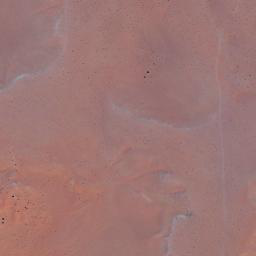

In [32]:
load_img('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')


**plotting 25 different satellite images



In [36]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

In [35]:
path = '../input/satellite-image-classification/data/'
data_dir = pathlib.Path(path)

pictures = np.array(sorted([item.name for item in data_dir.glob("*")]))
pictures

array(['cloudy', 'desert', 'green_area', 'water'], dtype='<U10')

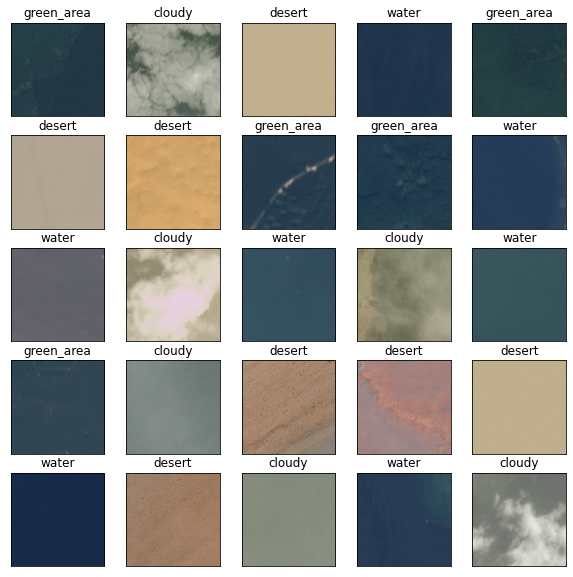

In [33]:
import random

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    
    random_class = random.choice(pictures)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)